In [1]:
import math
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
N = 100
dt = 0.001

In [3]:
def init(N):
    grid = np.zeros((N,N))
    grid[0] = np.ones(N)
    return grid

def update_dif(grid, D):
    grid_old = np.copy(grid)
    for j in range(1, len(grid)-1):
        for i in range(len(grid)):
            if i == 0:
                 grid[j,i] = grid_old[j,i] + D*(dt/N**2) * (grid_old[j+1,i] + grid_old[j-1,i]+ grid_old[j,i+1] +grid_old[j,-1] -4 * grid_old[j,i]) 
            elif i == N-1:
                 grid[j,i] = grid_old[j,i] + D*(dt/N**2) * (grid_old[j+1,i] + grid_old[j-1,i]+ grid_old[j,N-1] +grid_old[j,i-1] -4 * grid_old[j,i]) 
            else:
                 grid[j,i] = grid_old[j,i] + D*(dt/N**2) * (grid_old[j+1,i] + grid_old[j-1,i]+ grid_old[j,i+1] +grid_old[j,i-1] -4 * grid_old[j,i])
    return(grid)  

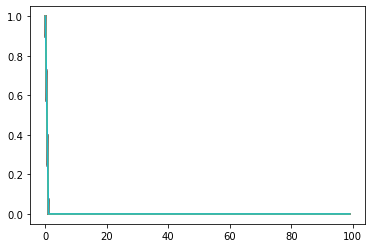

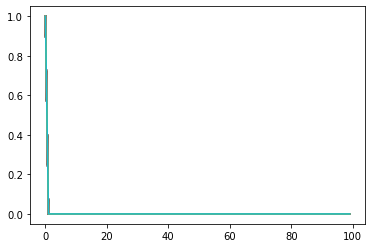

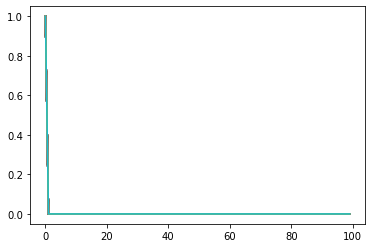

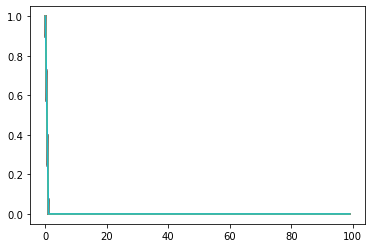

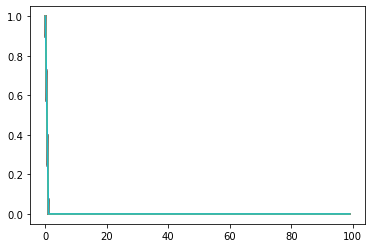

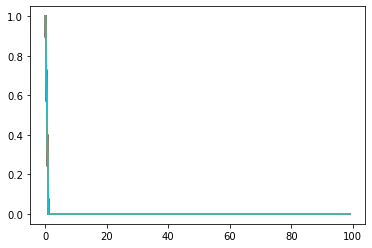

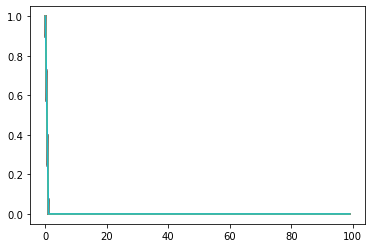

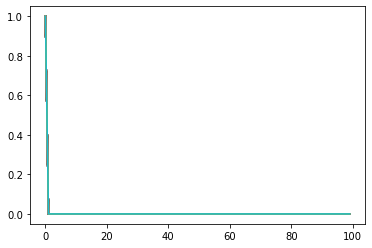

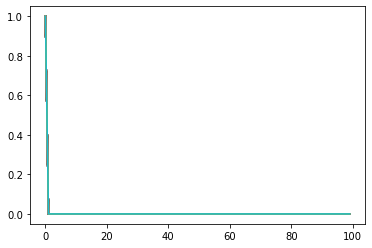

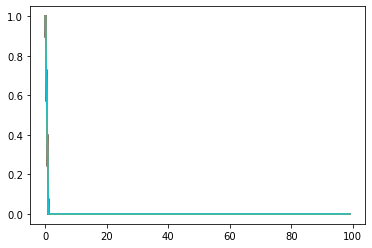

In [4]:
grid = init(N)
for t in range(1000):
    grid = update_dif(grid, 1)
    if t%100==0:
        plt.imshow(grid)
        plt.show()
     